In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [25]:
import pandas as pd

In [11]:
folder_path = "data/processed_data"
genre_types = ["cooking", "dance", "hardstyle", "workout"]
json_paths = [f"{folder_path}/{x}_data_processed.json" for x in genre_types]

In [18]:
cooking_data = None
with open(json_paths[0]) as f:
    cooking_data = json.load(f)

In [19]:
dance_data = None
with open(json_paths[1]) as f:
    dance_data = json.load(f)

In [20]:
hardstyle_data = None
with open(json_paths[2]) as f:
    hardstyle_data = json.load(f)

In [21]:
workout_data = None
with open(json_paths[3]) as f:
    workout_data = json.load(f)

In [22]:
def return_attribute_array(dataset, attr):
    return [x[attr] for x in dataset.values()]

In [36]:
print(f"Length of cooking data: {len(cooking_data)}")
print(f"Length of dance data: {len(dance_data)}")
print(f"Length of workout data: {len(workout_data)}")
print(f"Length of hardstyle data: {len(hardstyle_data)}")

Length of cooking data: 15
Length of dance data: 275
Length of workout data: 48
Length of hardstyle data: 20


### Acousticness

In [30]:
def return_attr_data(attr):
    cooking = return_attribute_array(cooking_data, attr)
    dance = return_attribute_array(dance_data, attr)
    workout = return_attribute_array(workout_data, attr)
    hardstyle = return_attribute_array(hardstyle_data, attr)   

    feature_data = [workout, cooking, dance, hardstyle]
    return feature_data

In [23]:
cooking_acoustic = return_attribute_array(cooking_data, "acousticness")
dance_acoustic = return_attribute_array(dance_data, "acousticness")
workout_acoustic = return_attribute_array(workout_data, "acousticness")
hardstyle_acoustic = return_attribute_array(hardstyle_data, "acousticness")

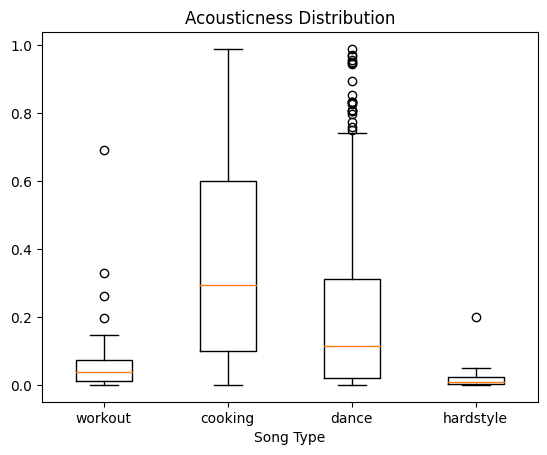

In [31]:
# acoustic_data = pd.DataFrame({
#     "cooking": cooking_acoustic,
#     "dance": dance_acoustic,
#     "workout": workout_acoustic,
#     "hardstyle_acoustic": hardstyle_acoustic
# })

acoustic_data = return_attr_data("acousticness")
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title("Acousticness Distribution")
plt.xlabel("Song Type")
plt.show()

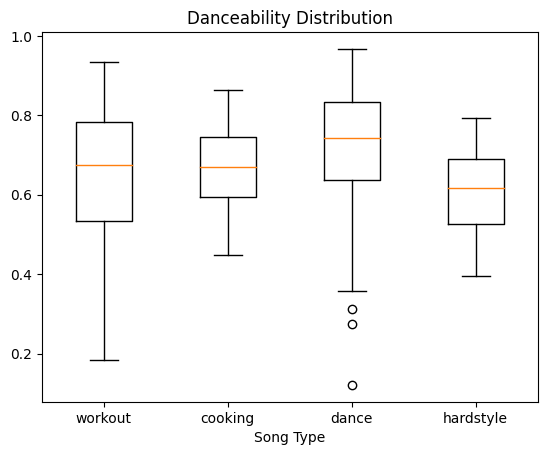

In [34]:
feature = "danceability"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

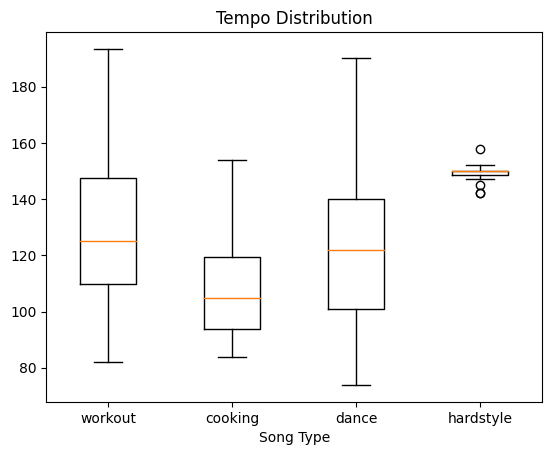

In [35]:
feature = "tempo"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

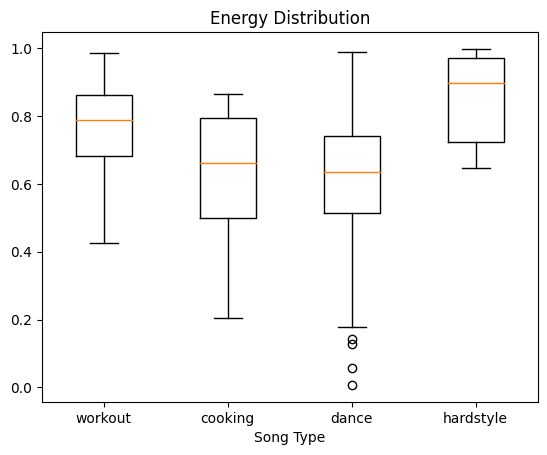

In [37]:
feature = "energy"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

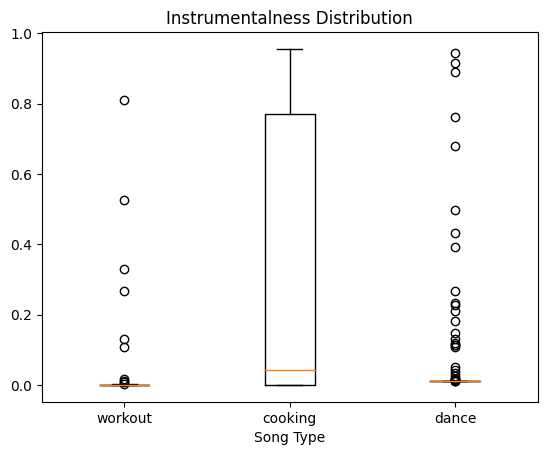

In [75]:
feature = "instrumentalness"
acoustic_data = return_attr_data(feature)
new_dance = []
for x in acoustic_data[2]:
    if x < 0.01:
        new_dance.append(0.01)
    else:
        new_dance.append(x)
acoustic_data[2] = new_dance
plt.boxplot(acoustic_data[:3], labels=["workout", "cooking", "dance"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

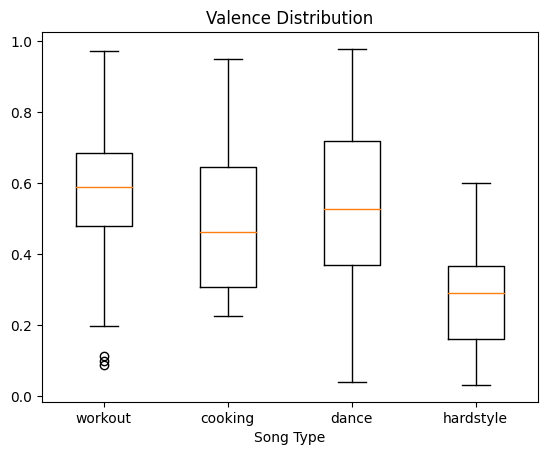

In [39]:
feature = "valence"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

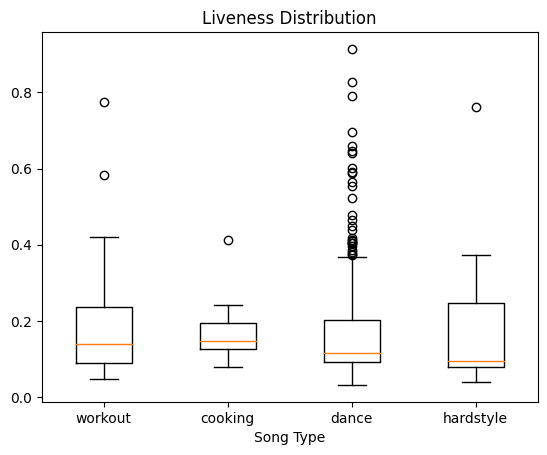

In [40]:
feature = "liveness"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

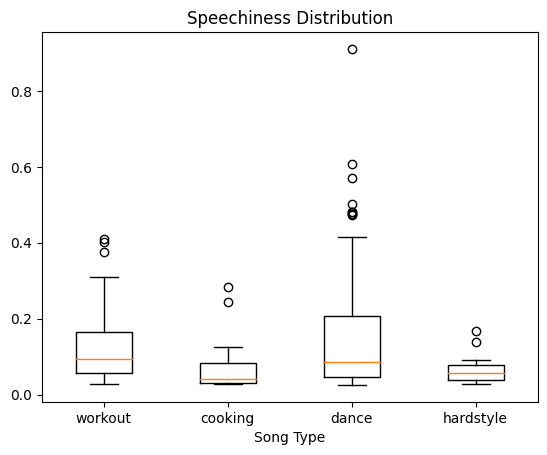

In [41]:
feature = "speechiness"
acoustic_data = return_attr_data(feature)
plt.boxplot(acoustic_data, labels=["workout", "cooking", "dance", "hardstyle"])
plt.title(f"{feature.capitalize()} Distribution")
plt.xlabel("Song Type")
plt.show()

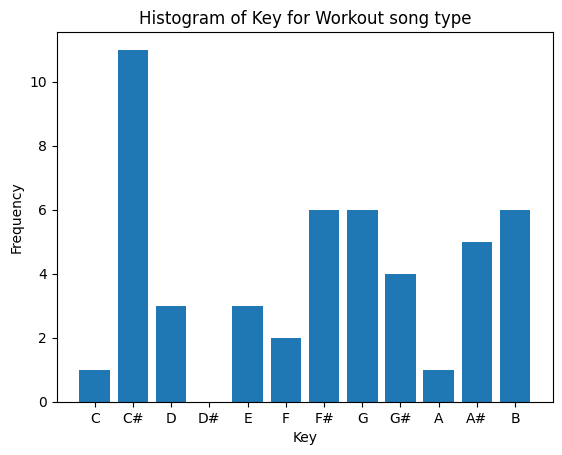

In [50]:
feature = "key"
acoustic_data = return_attr_data(feature)
key_scale = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
# Convert the data to numerical values
data_num = np.zeros(len(acoustic_data[0]))
for i in range(len(acoustic_data[0])):
    data_num[i] = key_scale.index(acoustic_data[0][i]) + 0.5

# Create the histogram
plt.hist(data_num, bins=np.arange(len(key_scale)+1), rwidth=0.8)

# Add axis labels and a title
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Histogram of Key for Workout song type')

# Set the tick labels for the x-axis to be the original strings
plt.xticks(np.arange(len(key_scale))+0.5, key_scale)

# Show the plot
plt.show()

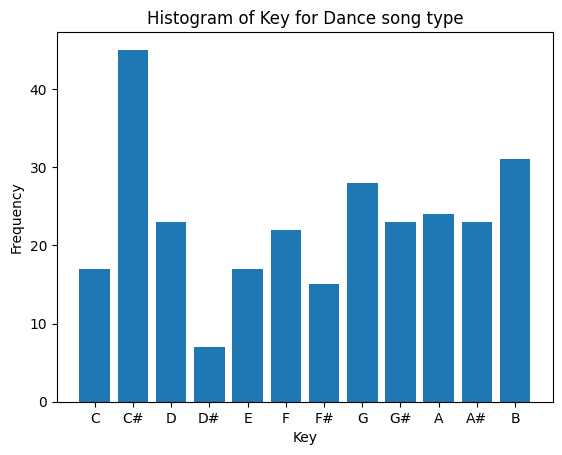

In [49]:
feature = "key"
acoustic_data = return_attr_data(feature)
key_scale = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
# Convert the data to numerical values
data_num = np.zeros(len(acoustic_data[2]))
for i in range(len(acoustic_data[2])):
    data_num[i] = key_scale.index(acoustic_data[2][i]) + 0.5

# Create the histogram
plt.hist(data_num, bins=np.arange(len(key_scale)+1), rwidth=0.8)

# Add axis labels and a title
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Histogram of Key for Dance song type')

# Set the tick labels for the x-axis to be the original strings
plt.xticks(np.arange(len(key_scale))+0.5, key_scale)

# Show the plot
plt.show()

In [76]:
feature = "mode"
acoustic_data = return_attr_data(feature)

In [78]:
acoustic_data[3]

['Minor',
 'Major',
 'Minor',
 'Major',
 'Major',
 'Major',
 'Major',
 'Major',
 'Major',
 'Minor',
 'Major',
 'Major',
 'Minor',
 'Major',
 'Minor',
 'Minor',
 'Minor',
 'Major',
 'Minor',
 'Major']

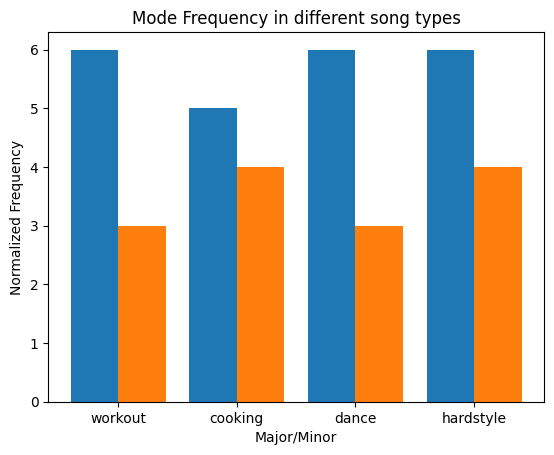

In [86]:
bar_width = 0.2
genre_names=["workout", "cooking", "dance", "hardstyle"]
x_pos = np.arange(len(genre_names))
y_1 = []
y_2 = []
for dat in acoustic_data:
    major = dat.count("Major")
    minor = dat.count("Minor")
    
    y_1.append(int(major/len(dat)*10))
    y_2.append(int(minor/len(dat)*10))


width=0.4

fig, ax = plt.subplots()

ax.bar(x_pos-bar_width, y_1, width)
ax.bar(x_pos+bar_width, y_2, width)

# Set the axis labels and the title
ax.set_xlabel("Major/Minor")
ax.set_ylabel("Normalized Frequency")
ax.set_title("Mode Frequency in different song types")

# Set the tick positions and labels
ax.set_xticks(x_pos)
ax.set_xticklabels(genre_names)

# Show the plot
plt.show()